In [ ]:
import pandas as pd
import keras as keras
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.keras.layers import LSTM, Dense
import tensorflow as tf
import glob
import numpy as np
import matplotlib.pyplot as plt
import csv
from python_speech_features import mfcc

In [ ]:
#1,3,6 consiguen un 75% val
paths = [


            str(os.getcwd() +"/pruebas/preguntas_01-50/javier/ses01/"),  #train consigue 75% val
               str(os.getcwd() +"/pruebas/preguntas_01-50/javier/ses02/"),  # train no pasa del 50% val / consigue 72% cambiando datos de validacion pero no repite
               str(os.getcwd() +"/pruebas/preguntas_01-50/javier/ses03/") , #train consigue 75% val  cambiando datos val
      str(os.getcwd() +"/pruebas/preguntas_01-50/javier/ses04/") ,  # no pasa del 0,66 normalmenmte 0,5
      str(os.getcwd() +"/pruebas/preguntas_01-50/javier/ses05/") , # despues de varios intentos consigue el 75%
     str(os.getcwd() +"/pruebas/preguntas_01-50/javier/ses06/") ,  # consigue hasta un 91% !! alcanza 75 varias veces
         str(os.getcwd() +"/pruebas/preguntas_01-50/javier/ses07/") ,  # consigue hasta un 91% !! alcanza 75 varias veces
        str(os.getcwd() +"/pruebas/fase1_si/javier/ses_test01/") ,
    str(os.getcwd() +"/pruebas/fase1_si/javier/ses_test02/") ,
    str(os.getcwd() +"/pruebas/fase1_si/javier/ses_test03/") ,
    str(os.getcwd() +"/pruebas/fase1_si/javier/ses_train01/") ,


     # str(os.getcwd() +"/pruebas/preguntas_01-50/silvia/ses01/")      ,
     #     str(os.getcwd() +"/pruebas/preguntas_01-50/silvia/ses02/")  ,
     #      str(os.getcwd() +"/pruebas/preguntas_01-50/silvia/ses03/")   ,
     #      str(os.getcwd() +"/pruebas/preguntas_01-50/silvia/ses03/")




        ]
window = 350
# window = 350
# window = 250
# window = 375
step = 100
# step = 125

def convert_to_mfccs(wav):
    return mfcc(wav, 1, winstep=step, winlen=window, numcep=12)
     # return mfcc(wav, 1,winlen=25, winstep=1, numcep=26)



def load_data(paths):
    dfRaw = []
    X_raw_train = []
    y_raw_train =[]
    filter=[]
    filterLastRows = 1000
    # filterLastRows = 500
    # filterLastRows = 750

    i=0
    # print (paths)
    for path in paths:
        dfHead = pd.read_csv(path + 'head.csv')
        all_raw_files = glob.glob(os.path.join(path , "*_raw*.csv"))
        # print(dfHead[dfHead['questionCode']==24].iloc[0]['response'])

        for filename in all_raw_files:
            dfRaw = pd.read_csv(filename, index_col=None, header=0)
            # print(filename)
            if len(dfRaw)>filterLastRows:
                qCode = dfRaw['questionCode'].iloc[[0]][0]
                # print(qCode)
                X_raw_train.append([])
                X = np.array(dfRaw.tail(filterLastRows)['rawEeg'])
                # Pot MFCC spectrogram of input signal
                input_signal =X
                # print(input_signal)
                # ax = ax_list[0]
                data = convert_to_mfccs(input_signal)
                # X_raw_train[i].append([])
                # X_raw_train[i][0] = data
                X_raw_train[i] = data

                # for idx, it in enumerate(X):
                #     X_raw_train[i].append([])
                #     X_raw_train[i][idx].append([])
                #     X_raw_train[i][idx][0] = X[idx]
                y_raw_train.append([])
                y_raw_train[i].append([])
                y_raw_train[i][0] = dfHead[dfHead['questionCode']==qCode].iloc[0]['response']
                i=i+1
    return X_raw_train,y_raw_train


X_raw_train = []
y_raw_train =[]
X_raw_train,y_raw_train= load_data(paths)
X = np.array(X_raw_train)
# X = np.array((X-np.min(X))/(np.max(X)-np.min(X)))
# X = X/np.std(X)
y = np.array(y_raw_train)
X.shape, y.shape


((127, 8, 12), (127, 1))

In [ ]:
# 2 , 5, 8 funcionan bien
# 5 y 5-F1
# ses03 70% con entreno 1,3,6 nromalizando
# ses02 89% con entreno 1,3,6 nromalizando
# ses07  y FASE1/ses10 con entreno 1,3,6 bien
paths_test = [
          str(os.getcwd() +"/pruebas/test/javier/ses01/"),
            str(os.getcwd() +"/pruebas/test/javier/ses02/"),
         str(os.getcwd() +"/pruebas/test/javier/ses03/"),
              str(os.getcwd() +"/pruebas/test/javier/ses04/"),
                str(os.getcwd() +"/pruebas/test/javier/ses05/"),
               str(os.getcwd() +"/pruebas/test/javier/ses06/"),
           str(os.getcwd() +"/pruebas/test/javier/ses07/"),
          str(os.getcwd() +"/pruebas/test/javier/ses08/"),
          str(os.getcwd() +"/pruebas/test/javier/ses09/")   ,
               str(os.getcwd() +"/pruebas/test/javier/ses10/")   ,
              str(os.getcwd() +"/pruebas/test/javier/ses11/")   ,
                  str(os.getcwd() +"/pruebas/test/javier/ses12/")   ,

    # str(os.getcwd() +"/pruebas/test/silvia/ses01/")   ,
    # str(os.getcwd() +"/pruebas/test/silvia/ses02/")      ,
    # str(os.getcwd() +"/pruebas/test/silvia/ses03/")     ,
    #  str(os.getcwd() +"/pruebas/test/silvia/ses04/")     ,
    # str(os.getcwd() +"/pruebas/test/silvia/sesbal/")     ,

        ]

x_test_raw, y_test_raw = load_data(paths_test)
x_test = np.array(x_test_raw)
y_test = np.array(y_test_raw)
x_test.shape

(98, 8, 12)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def show_results(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test,pred_y)
    plt.figure(figsize=(2,2))
    labels = ['0: No', '1: Si']
    sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt='d')
    plt.title('Confusion matrix')
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

    print(classification_report(y_test,pred_y))


C:\Users\javis\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:


def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)


def get_timed_series(dataArr):
    time_step = []
    data = []
    step=0
    for row in dataArr:
        data.append(float(row))
        # print(row[3])
        time_step.append(step)
        step = step + 1
    return np.array(time_step),np.array(data)


# series = np.array(temps)
# time = np.array(time_step)
# time,series = get_timed_series(X_train[0])
# plt.figure(figsize=(10, 6))
# plot_series(time, series)

# # print(y_train[0])

# time,series = get_timed_series(np.array(dfRaw[dfRaw['questionCode']==22].iloc[:,3]))
# plt.figure(figsize=(10, 6))
# plot_series(time, series)



# time,series = get_timed_series(np.array(dfEmot[dfEmot['questionCode']==22].iloc[:,10]))
# plt.figure(figsize=(10, 6))
# plot_series(time, series)


import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from python_speech_features import mfcc

fig, ax_list = plt.subplots(nrows=2, figsize=(10, 15), gridspec_kw={'wspace': 0, 'hspace': 0.2}, dpi=100)
print(ax_list)
window = 75
step = 25
input_signal =X[0]
# print(input_signal)
# Pot MFCC spectrogram of input signal
ax = ax_list[0]
def convert_to_mfccs(wav):
    return mfcc(wav, 1, winstep=step, winlen=window, numcep=26)

# data = convert_to_mfccs(input_signal)
data = input_signal
print(len(data))
print(data.shape)

presentation_steps = np.arange(data.shape[0])
ax.imshow(data.T, aspect="auto", interpolation="nearest")
ax.set_ylabel("MFCC features")

plt.show()

In [ ]:

#Split twice to get the validation set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25)

y_val_cat = y_train_cat =keras.utils.to_categorical(y_val,2)
y_train_cat =keras.utils.to_categorical(y_train,2)


X_train.shape,  y_train.shape, X_val.shape, y_val.shape, len(y_train),  len(y_val)
#
y_val_cat

NameError: name 'train_test_split' is not defined

In [ ]:
y_val_cat, y_val

In [ ]:
y_val, y_train,
X_train.shape,y_train.shape

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.66 and logs.get('val_accuracy')> 0.72 ):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks =myCallback()

In [ ]:
### MODEL - 1 ######

keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

# with tf.compat.v1.Session() as sess0:
model = keras.Sequential()


input_shape=(X_train.shape[1],X_train.shape[2])
# model.add(keras.layers.Conv1D(filters=32,kernel_size=5,strides=1,padding="causal", activation="relu",input_shape=input_shape)) model.add(keras.layers.Flatten(input_shape=(X_train.shape[1],X_train.shape[2],1))) #transforma la matriz de 28x28 en un vector
# model.add(tf.keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten(input_shape=input_shape)) #transforma la matriz de 28x28 en un vector
# model.add(keras.layers.BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.25))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dropout(0.25))


# model.add(keras.layers.Dense(2, activation="softmax"))
model.add(keras.layers.Dense(2, activation="sigmoid"))



# model.add(Dense(60, activation='relu'))
# model.add(Dense(60, activation='relu'))
# model.add(Dense(2, activation='sigmoid'))
model.summary()




# model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])
# model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.compile(loss = 'sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])




In [ ]:
# model.save('model_javier_raw_cep_08_3sets_72per.keras')


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.66 and logs.get('accuracy')> 0.72 ):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks1 =myCallback()


history = model.fit(X_train, y_train_cat, epochs=50, batch_size=16, validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks1])


y_pred = model.predict(X_val)
y_pred2 = [np.argmax(i) for i in y_pred]
y_val2=  [np.argmax(i) for i in y_val_cat]
show_results(y_val,y_pred2)


x_test = np.array(x_test_raw)
y_test = np.array(y_test_raw)
y_test_pred = model.predict(x_test)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)

In [ ]:
 # model.save('model_javier_raw_cep_05.keras')


In [ ]:
import tensorflow as tf
import tensorflow.keras
import tensorflow.keras.layers
from tensorflow.keras.layers import LSTM, Dense, Flatten,Activation

keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

input_shape=(X_train.shape[1],X_train.shape[2])

# with tf.compat.v1.Session() as sess0:
# assert not tf.executing_eagerly()
model = keras.Sequential()

model.add(Dense(32, input_shape=input_shape, activation='tanh'))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(keras.layers.BatchNormalization())

model.add(Dense(128, activation='tanh'))
model.add(keras.layers.BatchNormalization())

model.add(Dense(128, activation='relu'))
model.add(keras.layers.BatchNormalization())

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Adam, an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.
model.summary()

#  history = model.fit(x=X_train_array, y=y_train_array, epochs=5, verbose=1, validation_split = 0.33, shuffle=True, class_weight=get_class_weights(pd.Series((list(set(labels))),dtype='category').cat.codes.values),batch_size=batch_size)
history = model.fit(x=X_train, y=y_train_cat, epochs=100, verbose=1, validation_split = 0.1, shuffle=True,batch_size=32,validation_data=(X_val, y_val_cat), callbacks=[callbacks])
                    # class_weight=get_class_weights(pd.Series(Y_train,dtype='category').cat.codes.values),batch_size=128,validation_data=(X_val, y_val_cat), callbacks=[callbacks])


# sess0.close()

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=16, validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks])
                    # class_weight=get_class_weights(pd.Series(Y_train,dtype='category').cat.codes.values),batch_size=128,validation_data=(X_val, y_val_cat), callbacks=[callbacks])


In [ ]:
X_train.shape

(99, 3, 12)

In [ ]:
#CONSERVAR 68 EN TEST
keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

input_shape=(X_train.shape[1],X_train.shape[2],1)
print(input_shape)

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(input_shape)))
model.add(keras.layers.Conv2D(48, kernel_size=(2, 2), activation='relu'))
model.add(keras.layers.Conv2D(120, kernel_size=(2, 2), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.25))

model.add(Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.4))
# model.add(Dense(num_classes, activation='softmax'))
model.add(keras.layers.Dense(2, activation="sigmoid"))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Adam, an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.
model.summary()

(8, 24, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 23, 32)         160       
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 22, 48)         6192      
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 21, 120)        23160     
                                                                 
 max_pooling2d (MaxPooling2  (None, 3, 11, 120)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 3, 11, 120)        0         
                                                                 
 flatten (Flatten)           (None, 3960)              0         
                                             

In [ ]:
# X_train

Epoch 1/100
6/6 [==============================] - 2s 66ms/step - loss: 0.9697 - accuracy: 0.5579 - val_loss: 0.7280 - val_accuracy: 0.5312
Epoch 2/100
6/6 [==============================] - 0s 29ms/step - loss: 0.9117 - accuracy: 0.5263 - val_loss: 0.7328 - val_accuracy: 0.5312
Epoch 3/100
6/6 [==============================] - 0s 27ms/step - loss: 0.7179 - accuracy: 0.6105 - val_loss: 0.6883 - val_accuracy: 0.5312
Epoch 4/100
6/6 [==============================] - 0s 26ms/step - loss: 0.6616 - accuracy: 0.6421 - val_loss: 0.6991 - val_accuracy: 0.5312
Epoch 5/100
6/6 [==============================] - 0s 28ms/step - loss: 0.6320 - accuracy: 0.6526 - val_loss: 0.7157 - val_accuracy: 0.5312
Epoch 6/100
6/6 [==============================] - 0s 26ms/step - loss: 0.6420 - accuracy: 0.6316 - val_loss: 0.7052 - val_accuracy: 0.5312
Epoch 7/100
6/6 [==============================] - 0s 26ms/step - loss: 0.6356 - accuracy: 0.6526 - val_loss: 0.6832 - val_accuracy: 0.4688
Epoch 8/100
6/6 [===

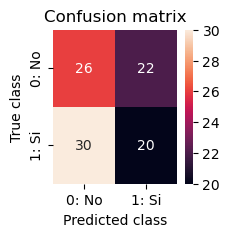

              precision    recall  f1-score   support

           0       0.46      0.54      0.50        48
           1       0.48      0.40      0.43        50

    accuracy                           0.47        98
   macro avg       0.47      0.47      0.47        98
weighted avg       0.47      0.47      0.47        98



In [ ]:

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.53 and logs.get('accuracy')> 0.7 ):
        # if( logs.get('accuracy')> 0.87 ):

              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks2 =myCallback()


history = model.fit(X_train, y_train_cat, epochs=100, batch_size=16, validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks2])
# history = model.fit(X_train, y_train_cat, epochs=100, batch_size=16, shuffle=True, callbacks=[callbacks2])


y_pred = model.predict(X_val)
y_pred2 = [np.argmax(i) for i in y_pred]
y_val2=  [np.argmax(i) for i in y_val_cat]
# show_results(y_val,y_pred2)


x_test = np.array(x_test_raw)

y_test = np.array(y_test_raw)
y_test_pred = model.predict(x_test)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)

In [ ]:
# model.save('model_javier_raw_cep_15_model2_500m_99acc_42val_63alltest.keras')


In [ ]:
keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

input_shape=(X_train.shape[1],X_train.shape[2],1)
print(input_shape)

# with tf.compat.v1.Session() as sess0:
# assert not tf.executing_eagerly()
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(2, 2), activation='tanh', input_shape=(input_shape)))
model.add(keras.layers.Conv2D(48, kernel_size=(2, 2), activation='tanh'))
model.add(keras.layers.Conv2D(120, kernel_size=(2, 2), activation='tanh'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(Dense(128, activation='tanh'))
model.add(keras.layers.Dropout(0.25))

model.add(Dense(64, activation='tanh'))
model.add(keras.layers.Dropout(0.4))
# model.add(Dense(num_classes, activation='softmax'))
model.add(keras.layers.Dense(2, activation="sigmoid"))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Adam, an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments.
model.summary()

(6, 12, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 5, 11, 32)         160       
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 10, 48)         6192      
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 9, 120)         23160     
                                                                 
 max_pooling2d (MaxPooling2  (None, 1, 4, 120)         0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 1, 4, 120)         0         
                                                                 
 flatten (Flatten)           (None, 480)               0         
                                             

Epoch 1/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0276 - accuracy: 0.9798 - val_loss: 4.7076 - val_accuracy: 0.3939
Epoch 2/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3106 - accuracy: 0.9394 - val_loss: 4.0361 - val_accuracy: 0.4242
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1353 - accuracy: 0.9596 - val_loss: 2.3962 - val_accuracy: 0.5152
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.1775 - accuracy: 0.9596 - val_loss: 1.9447 - val_accuracy: 0.4848
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0397 - accuracy: 0.9899 - val_loss: 1.8997 - val_accuracy: 0.4848
Epoch 6/100
7/7 [==============================] - 0s 14ms/step - loss: 0.0383 - accuracy: 0.9798 - val_loss: 1.6991 - val_accuracy: 0.5152
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.0139 - accuracy: 1.0000 - val_loss: 1.9729 - val_accuracy: 0.4242
Epoch 8/100
7/7 [===

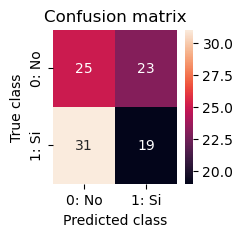

              precision    recall  f1-score   support

           0       0.45      0.52      0.48        48
           1       0.45      0.38      0.41        50

    accuracy                           0.45        98
   macro avg       0.45      0.45      0.45        98
weighted avg       0.45      0.45      0.45        98



In [ ]:

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')> 0.6 and logs.get('accuracy')> 0.67 ):
        # if( logs.get('accuracy')> 0.87 ):

              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True
callbacks3 =myCallback()


history = model.fit(X_train, y_train_cat, epochs=100, batch_size=16, validation_data=(X_val, y_val_cat), shuffle=True, callbacks=[callbacks3])


y_pred = model.predict(X_val)
y_pred2 = [np.argmax(i) for i in y_pred]
y_val2=  [np.argmax(i) for i in y_val_cat]
# show_results(y_val,y_pred2)


x_test = np.array(x_test_raw)
y_test = np.array(y_test_raw)
y_test_pred = model.predict(x_test)
y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)

In [ ]:
y_train.shape

(99, 1)

In [ ]:
X.shape


(127, 8, 12)

In [ ]:
x_flat =[]
y_flat =[]
# x_flat =np.array
# y_flat =np.array
def get_flat(X1,Y1):
    x_flat =[]
    y_flat =[]
    # x_flat =np.array
    # y_flat =np.array
    # print(str(len(X1)))
    for idx, itx in enumerate(X1):
    # for idx in range(0, len(X1), 2):
        # print(idx)
        # itx= X1[idx]
        # x = []
        for idy, ity in enumerate(X1[idx]):
            x = []
            # x.append(idx)
            # x.append(idy)

            for idz, itz in enumerate(X1[idx][idy]):
                x.append(itz)

        # if (len(x)>14):
        #     print("len big:" + str(itx))
            x_flat.append(x)
            y_flat.append(Y1[idx])

    x_flat = pd.DataFrame(x_flat)
    scaler = StandardScaler()
    x_flat = DataFrame(scaler.fit_transform(x_flat))
    y_flat = pd.DataFrame(y_flat)
    return x_flat,y_flat


# for idx, itx in enumerate(X):
#     for idy, ity in enumerate(X[idx]):
#         x = []
#         x.append(idx)
#         x.append(idy)
#         for idz, itz in enumerate(X[idx][idy]):
#             x.append(itz)
#         if (len(x)>14):
#             print("len big:" + str(itx))
#         x_flat.append(x)
#         y_flat.append(y[idx])

# x_flat = pd.DataFrame(x_flat)
# y_flat = pd.DataFrame(y_flat)


# X_train_flat, X_test_flat, y_train_flat, y_test_flat = train_test_split(x_flat, y_flat, test_size=0.25)
# X_train_flat.shape, y_train_flat.shape


X_train_flat,y_train_flat = get_flat(X,y)
X_test_flat, y_test_flat = get_flat(x_test,y_test)

print(X_train_flat.shape)
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_flat = DataFrame(scaler.fit_transform(x_flat))

# X_test = DataFrame(scaler.fit_transform(X_test))
# x_flat

from sklearn.svm import SVC

# defatul: C=1, gamma=scale, kernel=rbf


model_svc = SVC()
# model = SVC(C=0.1, kernel='rbf', gamma='scale') #jav 53
# model_svc = SVC(C=100, kernel='linear')
model_svc = SVC(C=0.3, kernel='sigmoid') #jav 55
# model_svc = SVC(C=2, kernel='sigmoid') #silv 57
# model_svc = SVC(C=10, kernel='linear')

model_svc.fit(X_train_flat, y_train_flat)
score = model_svc.score(X_test_flat, y_test_flat)

print(score)


(1016, 12)
0.5522959183673469


In [ ]:
# X_train_flat

['model_silvia_raw_cep_svc_03_4ses_alltest70.svc']

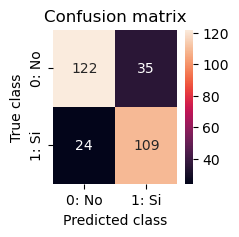

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       157
           1       0.76      0.82      0.79       133

    accuracy                           0.80       290
   macro avg       0.80      0.80      0.80       290
weighted avg       0.80      0.80      0.80       290



In [ ]:
pred = model_svc.predict(X_test_flat)
show_results(y_test_flat,pred)
# print(confusion_matrix(X_test_flat,pred))

In [ ]:
from joblib import dump, load
dump(model_svc, 'model_javier_raw_cep_svc_sigmoid03_alltest55.svc')
# dump(model_svc, 'model_silvia_raw_cep_svc_13_sigmoid2_alltestbal57.svc')
# model_svc.save('model_javier_raw_cep_svc.svc')
# model_svc = load('model_silvia_raw_cep_svc_09_4ses_alltestbal74.svc')

['model_javier_raw_cep_svc_sigmoid03_alltest55.svc']

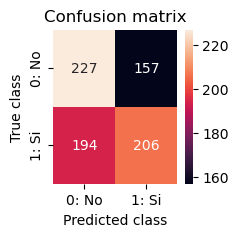

              precision    recall  f1-score   support

           0       0.54      0.59      0.56       384
           1       0.57      0.52      0.54       400

    accuracy                           0.55       784
   macro avg       0.55      0.55      0.55       784
weighted avg       0.55      0.55      0.55       784



In [ ]:
# model_svc = load('model_silvia_raw_cep_svc_13_sigmoid2_alltestbal57.svc')
model_svc = load('model_javier_raw_cep_svc_sigmoid03_alltest55.svc')

pred = model_svc.predict(X_test_flat)
show_results(y_test_flat,pred)

4/4 [==============================] - 0s 5ms/step


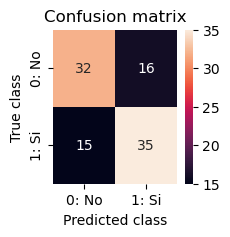

              precision    recall  f1-score   support

           0       0.68      0.67      0.67        48
           1       0.69      0.70      0.69        50

    accuracy                           0.68        98
   macro avg       0.68      0.68      0.68        98
weighted avg       0.68      0.68      0.68        98



In [ ]:
keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
# model = keras.models.load_model('model_silvia_raw_cep_05_model2_4ses_99acc_91val_66alltest.keras')
# model = keras.models.load_model('model_silvia_raw_cep_02_model2_97acc_73val_74alltest.keras')
model = keras.models.load_model('model_javier_raw_cep_10_68alltest.keras')
y_test_pred2 = [np.argmax(i) for i in model.predict(x_test)]
show_results(y_test,y_test_pred2)

(None, 8, 12, 1) <dtype: 'float32'>
(None, 2) <dtype: 'float32'>
conv2d (None, 8, 12, 1) float32
conv2d_1 (None, 7, 11, 32) float32
conv2d_2 (None, 6, 10, 48) float32
max_pooling2d (None, 5, 9, 120) float32
dropout (None, 2, 4, 120) float32
flatten (None, 2, 4, 120) float32
dense (None, 960) float32
dropout_1 (None, 128) float32
dense_1 (None, 128) float32
dropout_2 (None, 64) float32
dense_2 (None, 64) float32
4/4 [==============================] - 0s 4ms/step


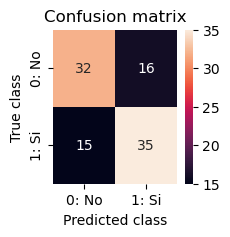

              precision    recall  f1-score   support

           0       0.68      0.67      0.67        48
           1       0.69      0.70      0.69        50

    accuracy                           0.68        98
   macro avg       0.68      0.68      0.68        98
weighted avg       0.68      0.68      0.68        98



In [ ]:
# model = keras.models.load_model('model_javier_raw_cep_10_68alltest.keras')

[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

x_test_norm = x_test
# x_test_norm = np.array((x_test_norm-np.min(x_test_norm))/(np.max(x_test_norm)-np.min(x_test_norm)))
# x_test_norm = x_test_norm/np.std(x_test_norm)


# x_test.shape
y_test_pred = model.predict(x_test_norm)

y_test_pred2 = [np.argmax(i) for i in y_test_pred]
show_results(y_test,y_test_pred2)